2022319225 Supatach Vanichayangkuranont

# Aggregate Labor Market Case Study

**Midsemester Assessment (25%)**

Prepared by [MachinaFantasma](https://phantomachine.github.io/) | [Twitter](https://twitter.com/MachinaFantasma)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Aggregate-Labor-Market-Case-Study" data-toc-modified-id="Aggregate-Labor-Market-Case-Study-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Aggregate Labor Market Case Study</a></span></li><li><span><a href="#Key-learning-points" data-toc-modified-id="Key-learning-points-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Key learning points</a></span></li><li><span><a href="#Aggregate-labor-market-variables" data-toc-modified-id="Aggregate-labor-market-variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Aggregate labor-market variables</a></span></li><li><span><a href="#Some-custom-functions" data-toc-modified-id="Some-custom-functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Some custom functions</a></span><ul class="toc-item"><li><span><a href="#QUESTION-1-(Beveridge-curve)" data-toc-modified-id="QUESTION-1-(Beveridge-curve)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>QUESTION 1 (Beveridge curve)</a></span></li><li><span><a href="#QUESTION-2-(Market-tightness)" data-toc-modified-id="QUESTION-2-(Market-tightness)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>QUESTION 2 (Market tightness)</a></span></li></ul></li><li><span><a href="#Data-from-Hagedorn-and-Manovskii-(HM)" data-toc-modified-id="Data-from-Hagedorn-and-Manovskii-(HM)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data from Hagedorn and Manovskii (HM)</a></span></li><li><span><a href="#Key-Labor-Market-Observations" data-toc-modified-id="Key-Labor-Market-Observations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Key Labor Market Observations</a></span><ul class="toc-item"><li><span><a href="#QUESTION-3" data-toc-modified-id="QUESTION-3-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>QUESTION 3</a></span></li><li><span><a href="#QUESTION-4" data-toc-modified-id="QUESTION-4-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>QUESTION 4</a></span></li></ul></li><li><span><a href="#Related-References" data-toc-modified-id="Related-References-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Related References</a></span></li></ul></div>

In [19]:
# Uncomment and run to install packages (if needed)

# !conda install seaborn

# !conda install -c conda-forge statsmodels

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [21]:
%matplotlib inline

# Key learning points

1. Understand some aggregate facts concerning the labor market (U.S. case study). 

2. Describe the Beveridge curve, and explain its importance.

3. Demonstrate your ability to use basic Python coding and data summary/visualization skills.

4. Sneak peek into the use of the ``pandas`` library and dataframe.

# Aggregate labor-market variables

|    Mnemonic     | Description                  |
|:----------------|:-----------------------------|
|    $p$          | Labor productivity (Output per worker)           |
|    $w$          | Real wage                 |
|    $u$          | Unemployed                   |
|    $u$        | Unemployment rate           |
|    $v$        | Job Vacancy rate           |
|    $\theta$    | $v/u$ ratio  |

# Some custom functions

The following custom functions are provided as optional tools. You may use these as you see fit, or, better yet write your own code solutions!

In [22]:
def hpfilter2df(df, λ=1600):
    """Hodrick-Prescott filter for separating cyclical and trend components
    assumed to underlie a time series. This function applies to series stored
    in a Pandas dataframe."""
    # Start off with empty DICT
    Y_cycle = {}
    Y_trend = {}
    # HP smoothing parameter (Shimer, AER2005)
    # λ = 1600
    # Loop over series in dfQ, apply filter to series named "key", store in DICTs
    for key, series in df.iteritems():
        Y_cycle[key], Y_trend[key] = sm.tsa.filters.hpfilter(series, λ)
    # Convert DICTs to Pandas dataframes
    Y_cycle = pd.DataFrame.from_dict(Y_cycle)
    Y_trend = pd.DataFrame.from_dict(Y_trend)
    return Y_cycle, Y_trend

In [23]:
def seaborn_jointplot(x_key, y_key, df, xlabel=None, ylabel=None):
    """Custom wrapper to do seaborn jointplots"""
    g = (sns.jointplot(x_key, y_key, 
                      data=df, 
                      kind="reg",
                      color ="blue",
                      marker="+",
                      joint_kws = {'scatter_kws':dict(alpha=0.2)}
                  )
    ).plot_joint(sns.kdeplot, zorder=0, n_levels=6)
    if xlabel != None:
        g.ax_joint.set_xlabel(xlabel)
    if ylabel != None:
        g.ax_joint.set_ylabel(ylabel)

In [24]:
def timeseries_df2acf1(df):
    """Take a Pandas dataframe df. Calculate first order autocorrelations."""
    # Loop to calculate first-order autocorrelation of each series
    autocorr1 = {}
    for key, series in df.iteritems():
        autocorr1[key] = series.autocorr(lag=1)
    acf_1 = pd.DataFrame.from_dict(autocorr1, orient='index', columns=["ACF(1)"])
    return acf_1

In [25]:
def correlation_map(df, figsize=(7,6), fontsize=0.8, colormap='coolwarm'):
    """Generate SEABORN heatmap for Pearson correlation table,
    given Pandas dataframe df."""
    # Get the lower triangle and diagonal of table
    matrix = np.tril(df.corr(), k=-1)
    # Mask/hide upper triangular duplicate
    plt.figure(figsize=figsize)
    sns.set(font_scale =fontsize)
    sns.heatmap(df.corr(), annot=True, cmap=colormap, mask=matrix)
    plt.show(block=False)

## QUESTION 1 (Beveridge curve)

Look up an undergraduate macroeconomics textbook (e.g., *Macroeconomics* by Stephen Williamson). Explain in a sentence or a few sentences what is a Beveridge curve. What sort of information is this curve supposed to convey?

The Beveridge curve shows the correlation between vacancy rate and unemployment rate, typically a negative correlation. A low vacancy rate and high unemployment rate part of the curve usually conveys that the labor market is unhealthy (loose market) and that many are jobless with no jobs to find, and vice versa (tight market). A shift outwards in the whole curve generally means that job-matching efficiency is increased, and vice versa.

## QUESTION 2 (Market tightness)

What is the interpretation of $θ = v/u$?

If one observes a downward sloping Beveridge Curve over a very long-run sample, what is the geometric (i.e., graphical) representation or interpretation of $\theta$?

$\theta$ represents market tightness or 'health' of the labor market. Higher $\theta$ means healtier market and a growing economy, and vice versa.

A low vacancy rate $v$ and high unemployment rate $u$ part of the curve usually conveys that the labor market is unhealthy (loose market) (low $\theta$) and that many are jobless with no jobs to find.

A high vacancy rate $v$ and low unemployment rate $u$ part of the curve usually conveys that the labor market is healthy (tight market) (high $\theta$) and that many jobs are readily available and there a less jobless.

# Data from Hagedorn and Manovskii (HM)

We now use HM's data and reproduce their Table 3.

Now let's take HM's data set from their [source on the AER website](https://www.aeaweb.org/articles?id=10.1257/aer.98.4.1692). 

HM provided their data as a ``STATA`` data file (``.dta`` format). We can use a nifty library called ``pandas`` to talk to this format and turn that into an easy to maipulate Data Frame here.

Below, we assume you have already downloaded their source files to the same directory as this notebook.

In [26]:
# Read and import HM dataset as a Pandas dataframe
dfhm = pd.read_stata('20060403_data/Data.dta')

# Add label's to each series in the dataframe
dfhm.columns = ["year", "quarter", r"$p$", r"$w$", r"$u$", r"$v$"]

# Add a new key-value pair to dataframe: market tightness series
dfhm[r"$\theta$"] = dfhm[r"$v$"]/dfhm[r"$u$"]

# Print to screen the first few lines of dfhm
dfhm.head()

,year,quarter,$p$,$w$,$u$,$v$,$\theta$
0,1951,1,48.799999,99.699997,3.500000,41.333332,11.809524
1,1951,2,48.700001,100.599998,3.100000,42.000000,13.548388
2,1951,3,49.599998,99.199997,3.166667,41.666668,13.157896
3,1951,4,49.599998,99.699997,3.366667,42.000000,12.475248
4,1952,1,50.000000,100.599998,3.066667,43.000000,14.021739


In [27]:
# ... and the tail
dfhm.tail(3)

,year,quarter,$p$,$w$,$u$,$v$,$\theta$
213,2004,2,131.800003,96.900002,5.566667,38.333332,6.886228
214,2004,3,132.399994,97.500000,5.433333,36.666668,6.748466
215,2004,4,133.000000,98.699997,5.433333,37.000000,6.809816


You can visualize and manipulate the dataframe ``dfhm`` easily.

For example, let's plot the unemployment series ``u``:

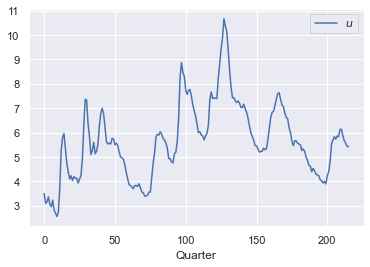

In [28]:
dfhm.plot(y=r"$u$", xlabel="Quarter")
plt.show()

Suppose you want to extract this series from the data frame, you can just do this:

In [29]:
urate = dfhm[r"$u$"]
print(urate)

0      3.500000
1      3.100000
2      3.166667
3      3.366667
4      3.066667
         ...   
211    5.866667
212    5.666667
213    5.566667
214    5.433333
215    5.433333
Name: $u$, Length: 216, dtype: float32


Below, we apply a time-series filter called the [Hodrick-Prescott filter](https://en.wikipedia.org/wiki/Hodrick%E2%80%93Prescott_filter) to "remove" potential long-run trend from short-run cyclical signals in each data series. 

(Without loss, we will be working with de-meaned data.)

In [30]:
# We'll drop the real-wage series (not used further below)
dfhmm = dfhm.drop(columns=["year", "quarter", r"$w$"])

# reorder for ease of comparison to HM's Table and Shimer's Table
dfhmmo = dfhmm[[r"$u$", r"$v$", r"$\theta$", r"$p$"]]

# Define variables as percentage deviation from respective sample means
dfhmmo = np.log(dfhmmo.divide(dfhmmo.mean()))

# Use HP filter to extract cycles from trends (HM's choice of λ)
Yhm_cycle, Yhm_trend = hpfilter2df(dfhmmo, λ=10.**5.0)

<AxesSubplot:>

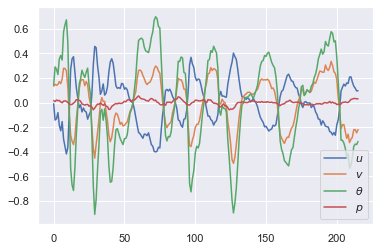

In [31]:
# Quick visual of the residual, "cyclical" information
Yhm_cycle.plot()

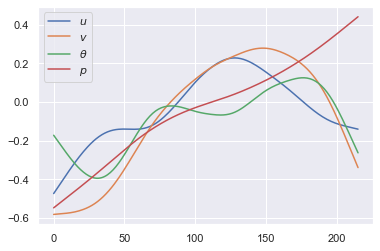

In [32]:
# Quick visual of the "trend" information
Yhm_trend.plot()
plt.show()

# Key Labor Market Observations

**INSTRUCTION.** From here onward, use the cyclical data stored in the dataframe ``Yhm_cycle``.

We'll summarize the co-movement (correlation) facts shown earlier.

## QUESTION 3

Use appropriate summary statistics (Pearson correlation table) *and* graphs (e.g., scatter plots) to show that:

1. $u$ and $v$ are negatively correlated;

2. $u$ and $p$ are negatively correlated; and

3. $\theta$ and $p$ are positively correlated

over the business cycle (i.e., in the series contained in ``Yhm_cycle``).

The Pearson correlation coefficient, -0.9018790719574107 , shows that the variables has negative correlation


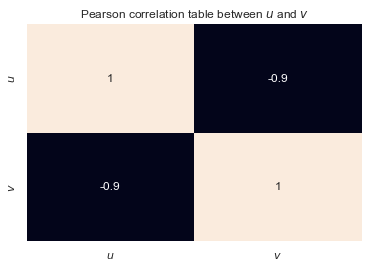

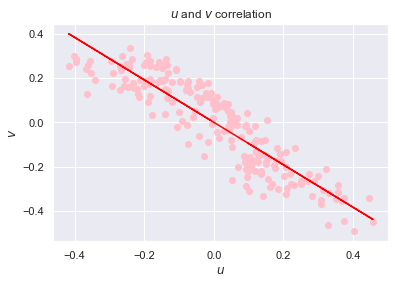

In [33]:
import scipy.stats

#utility function
def correlation_status(P):
    """
    The function takes in Pearson correlation coefficiant as an Int/Float input then returns the nature of the
    correlation, as negative or positive or no correlation.
    """
    if P < 0:
        return 'negative correlation'
    if P > 0:
        return 'positive correlation'
    return 'no correlation'

#define graphs variables u, v, p, theta
u = Yhm_cycle['$u$']
v = Yhm_cycle['$v$']
p = Yhm_cycle['$p$']
theta = Yhm_cycle['$\\theta$']

#calculate pearson correlation coefficient
corr_uv = scipy.stats.pearsonr(u,v)
print("The Pearson correlation coefficient,", corr_uv[0], ", shows that the variables has", correlation_status(corr_uv[0]))

#display heatmap for Pearson correlation table
d = pd.DataFrame(data = {'$u$': u, '$v$': v})
sns.set(font_scale=1)
heatmap = sns.heatmap(d.corr(), annot=True, cmap='rocket', cbar=False)
heatmap.set(title = 'Pearson correlation table between $u$ and $v$')

#create new window for scatter plot
plt.figure()

#plot u against v on a scatter plot
plt.scatter(u,v, color='Pink')

#calculate equation for trendline
z = np.polyfit(u,v,1)
poly = np.poly1d(z)

#add trendline to plot
plt.plot(u, poly(u), color='Red')

#add title and axis names
plt.title('$u$ and $v$ correlation')
plt.ylabel('$v$')
plt.xlabel('$u$')
plt.show();

The Pearson correlation coefficient, -0.38692551293482 , shows that the variables has negative correlation


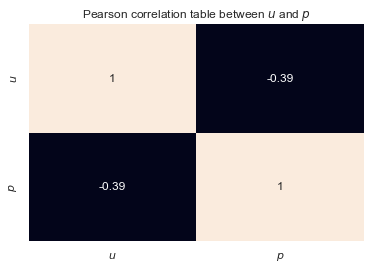

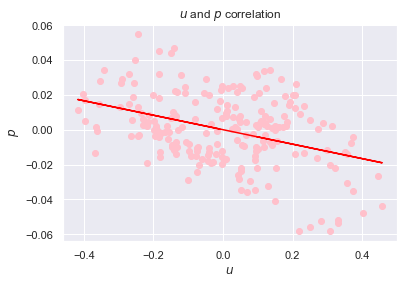

In [43]:
#calculate pearson correlation coefficient
corr_up = scipy.stats.pearsonr(u,p)
print("The Pearson correlation coefficient,", corr_up[0], ", shows that the variables has", correlation_status(corr_up[0]))

#display heatmap for Pearson correlation table
d = pd.DataFrame(data = {'$u$': u, '$p$': p})
sns.set(font_scale=1)
heatmap = sns.heatmap(d.corr(), annot=True, cmap='rocket', cbar=False)
heatmap.set(title = 'Pearson correlation table between $u$ and $p$')

#create new window for scatter plot
plt.figure()

#plot u against p on a scatter plot
plt.scatter(u,p, color='Pink')

#calculate equation for trendline
z = np.polyfit(u,p,1)
poly = np.poly1d(z)

#add trendline to plot
plt.plot(u, poly(u), color='Red')

#add title and axis names
plt.title('$u$ and $p$ correlation')
plt.ylabel('$p$')
plt.xlabel('$u$');

# d.plot.scatter('$u$','$p$');

The Pearson correlation coefficient, 0.37451400323251943 , shows that the variables has positive correlation


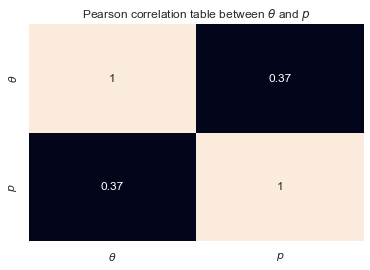

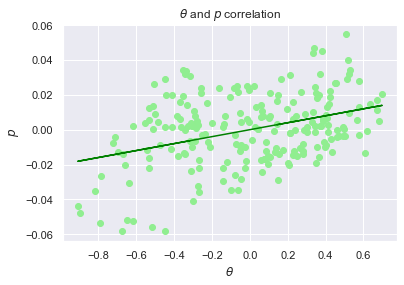

In [35]:
#calculate pearson correlation coefficient
corr_tp = scipy.stats.pearsonr(theta,p)
print("The Pearson correlation coefficient,", corr_tp[0], ", shows that the variables has", correlation_status(corr_tp[0]))

#display heatmap for Pearson correlation table
d = pd.DataFrame(data = {r'$\theta$': theta, '$p$': p})
sns.set(font_scale=1)
heatmap = sns.heatmap(d.corr(), annot=True, cmap='rocket', cbar=False)
heatmap.set(title = r'Pearson correlation table between $\theta$ and $p$')

#create new window for scatter plot
plt.figure()

#plot theta against p on a scatter plot
plt.scatter(theta,p, color='lightgreen')

#calculate equation for trendline
z = np.polyfit(theta,p,1)
poly = np.poly1d(z)

#add trendline to plot
plt.plot(theta, poly(theta), color='Green')

#add title and axis names
plt.title(r'$\theta$ and $p$ correlation')
plt.ylabel('$p$')
plt.xlabel(r'$\theta$');

In [36]:
# Your code and comments ... (add more cells if needed)

What does this mean for how these other variable co-move, on average? Explain your answer.

4. $u$ and $\theta$ are negatively correlated.

5. $v$ and $p$ are positively correlated.

6. $v$ and $\theta$ are positively correlated.

4. $u$ and $\theta$ are negatively correlated.

since $\theta$ is equal to the ratio of $v/u$, and from the previous exercise, we can observe that in q3.1, $u$ and $v$ are negatively correlated. This reinforces statement 4 as increasing $u$ will decrease $v$; hence decreasing the $v/u$ ratio and decreasing $\theta$.

In terms of economics, a lower vacancy rate or $v$ means less job are available; thus more unemployment rate or $u$. This also leads to the $u$ and $\theta$ correlation.

5. $v$ and $p$ are positively correlated.

We can observe in q3.1 and q3.2 that: $u$ and $v$ are negatively correlated and $u$ and $p$ are negatively correlated. We can derive that $v$ and $p$ are positively correlated due to this fact (since both goes in the opposite direction of $u$).

In terms of economics, a lower vacancy rate or $v$ means more jobs a filled; thus each worker can work less to fulfill requirements which leads to less output per worker or $p$.

6. $v$ and $\theta$ are positively correlated.

since $\theta$ is equal to the ratio of $v/u$, and from the previous exercise, we can observe that in q3.1, $u$ and $v$ are negatively correlated. This reinforces statement 6 as increasing $v$ will decrease $u$; hence increasing the $v/u$ ratio and increasing $\theta$.

In terms of economics, a lower vacancy rate or $v$ means less job are available; thus more unemployment rate or $u$. This also leads to the $v$ and $\theta$ correlation.

|    Mnemonic     | Description                  |
|:----------------|:-----------------------------|
|    $p$          | Labor productivity (Output per worker)           |
|    $w$          | Real wage                 |
|    $u$          | Unemployed                   |
|    $u$        | Unemployment rate           |
|    $v$        | Job Vacancy rate           |
|    $\theta$    | $v/u$ ratio  |

## QUESTION 4

Below is something we've prepared earlier.

The following figure extends the dataset above to include observations after the 2007/8 Great Recession.

What can you deduce from the empirical Beveridge Curve in the U.S. data below?

![bc-us-prepost_gfc.png](bc-us-prepost_gfc.png)

As observed from the graph above, the <font color='blue' style='font-weight:bold'>blue</font> dots which show data during 2000-12-31 to 2007-09-30 (around 2007-08 Great Recession), were clumped up in an area showing a general negative correlation between Vacancy rate and Employment rate. However, the <font color='red' style='font-weight:bold'>red</font> crosses which show data during 2007-12-31 to 2019-12-31 (after Great Recession), were showing a similar negative correlation between Vacancy rate and Employment rate but was shifted outwards. This is deduced as the efficiency in job matching process is greater (Beveridge Curve's tendency).

At 2007-12-31, the unemployment rate was ~5% and the vacancy rate was ~3.25%. This data point was hovering in the <font color='blue' style='font-weight:bold'>blue</font> dots zone. However there were only a small number of <font color='red' style='font-weight:bold'>red</font> crosses observed in the <font color='blue' style='font-weight:bold'>blue</font> dots zone. This can be deduced as after the Great recession, more jobs started to become were unavailable (not vacancy rate) thus the same vacancy rate before Great Recession (e.g., 2.5%), caused a way higher unemployment rate after the Great Recession as observed by <font color='blue' style='font-weight:bold'>blue</font> dots at (6,2.5) and <font color='red' style='font-weight:bold'>red</font> crosses at (9,2.5).

It can also be seen that at 2015-12-31, the axis of vacancy rate and unemployment rate was at (5,4) and at 2019-12-31 the axis is at (3.5,4.4). This can be deduced as economic growth or that the economy is recovered from the great recession as now more jobs are READILY available, while less people are unemployed.

# Related References

* Williamson, S. (2018), *Macroeconomics* (6th edition or later). Pearson Publishers. (Chapter 6).

* Hagedorn, Marcus, and Iourii Manovskii. 2008. ["The Cyclical Behavior of Equilibrium Unemployment and Vacancies Revisited." American Economic Review, 98 (4): 1692-1706](https://doi.org/10.1257/aer.98.4.1692).

* Shimer, Robert. 2005. ["The Cyclical Behavior of Equilibrium Unemployment and Vacancies." American Economic Review, 95 (1): 25-49](https://doi.org/10.1257/0002828053828572). 

* Petrosky‐Nadeau, N. and Zhang, L. (2017), ["Solving the Diamond–Mortensen–Pissarides model accurately." *Quantitative Economics*, 8: 611-650](https://doi.org/10.3982/QE452)